# Plotting multiple sequences

This snippet shows you how to plot a number of sequences as one combined event plot.

## Simple example
Let's first start by importing what we are going to need:

In [43]:
from combio.core import Sequence, Stimulus, StimSequence
from combio.visualization import plot_multiple_sequences
import numpy as np

# Additionally suppress warnings to avoid confusion
import warnings
warnings.filterwarnings('ignore')

Let's create two dummy sequences:

In [44]:
# This is for reproducible randomness (so you will get the same sequences as me)
rng = np.random.default_rng(seed=123)

# Create sequences
seq_isoc = Sequence.generate_isochronous(n=8, ioi=500)
seq_random = Sequence.generate_random_normal(n=8, mu=500, sigma=100, rng=rng)

Now we make a list of these sequences, and plot using `plot_multiple_sequences`.

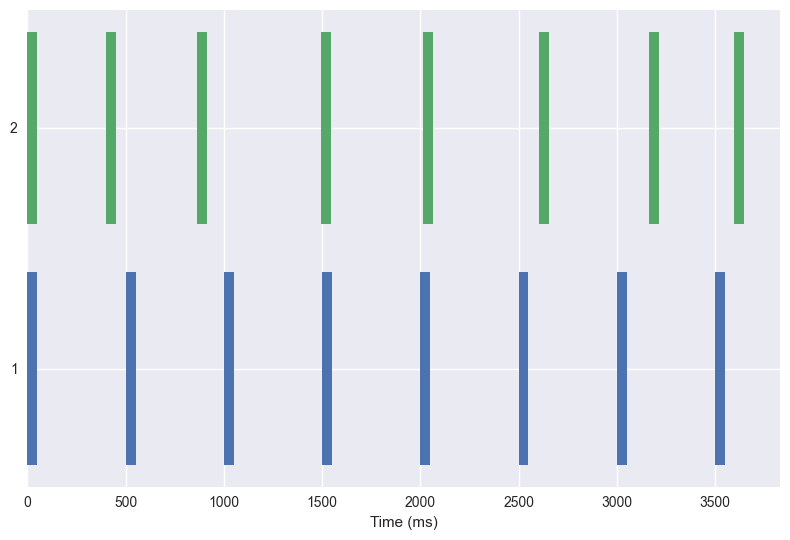

In [45]:
seqs = [seq_isoc, seq_random]
plot_multiple_sequences(seqs);

## Simple example with simple sequence onsets

In addition to passing Sequence or StimSequence objects, we can also plot sequences using a simple
list containing event onsets. Then, we can also plot with a different onset than zero.

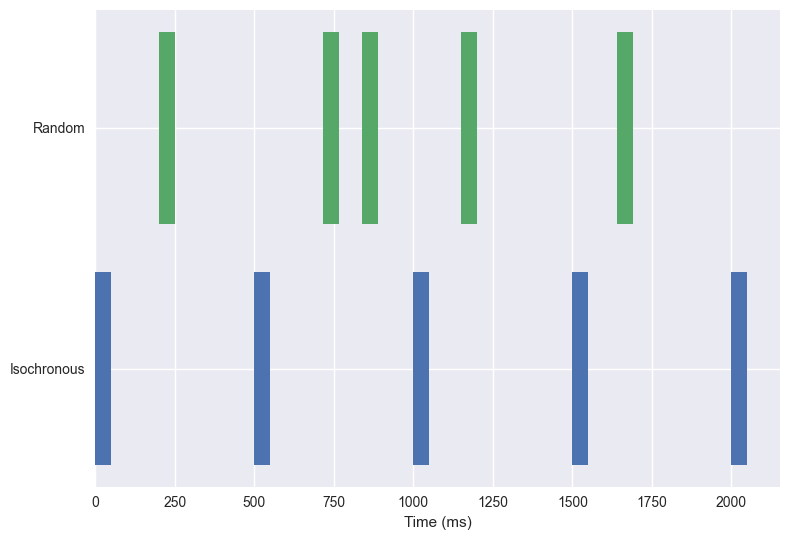

In [46]:
seq_isoc_onsets = Sequence.generate_isochronous(n=5, ioi=500).onsets  # Note how we get the onsets
seq_other_onsets = np.cumsum([200, 515, 123, 312, 489])

plot_multiple_sequences([seq_isoc_onsets, seq_other_onsets], sequence_names=["Isochronous", "Random"]);

## Complex example
In this example we randomly generate 10 sequences with random inter-onset intervals (IOIs), each containing 5 events
that also have random event durations.

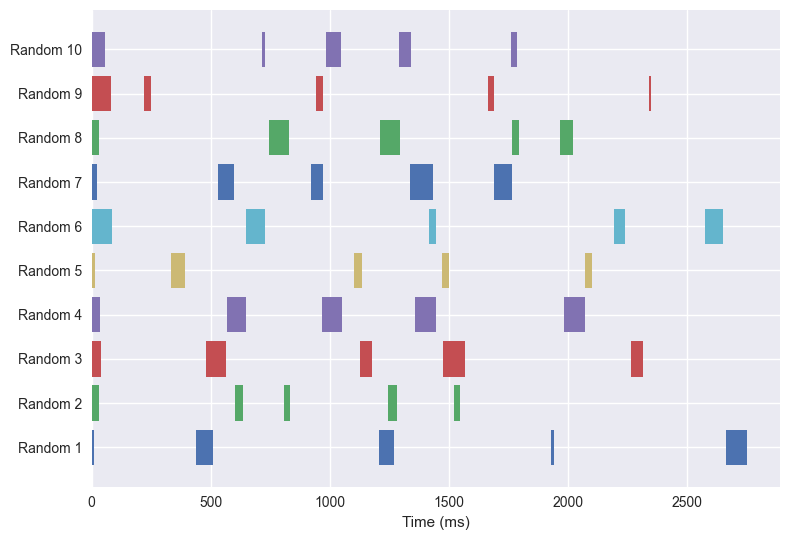

In [47]:
# For reproducible randomness
rng = np.random.default_rng(seed=123)

# Generate random sequences using
seqs = [Sequence.generate_random_uniform(n=5, a=200, b=800) for _ in range(10)]

# Create empty list that we will fill with StimSequence objects
stimseqs = []

# Loop over the sequences
for seq in seqs:
    # Generate 5 events with random durations
    stims = [Stimulus.generate(duration=x) for x in rng.integers(low=10, high=100, size=5)]
    # Create a StimSequence and add to stimseqs list
    stimseqs.append(StimSequence(stims, seq))

# Additionally give them names
sequence_names = [f"Random {i+1}" for i in range(len(stimseqs))]

# Now plot!!
plot_multiple_sequences(stimseqs, sequence_names=sequence_names);


## Adjusting the figure
Now, of course the standard settings for the plot are great, but what if we want to adjust the plot some more?

The plotting functions and methods used above all return a matplotlib `Figure` object, and a matplotlib `Axes` object.
Refer to the [matplotlib docs](https://matplotlib.org/stable/index.html) for more information about these objects.

These objects we can manipulate, and then show or save, as in the example below. We might want to suppress displaying
the unadjusted plot, which we can do by passing `suppress_display=True` to the plotting function.


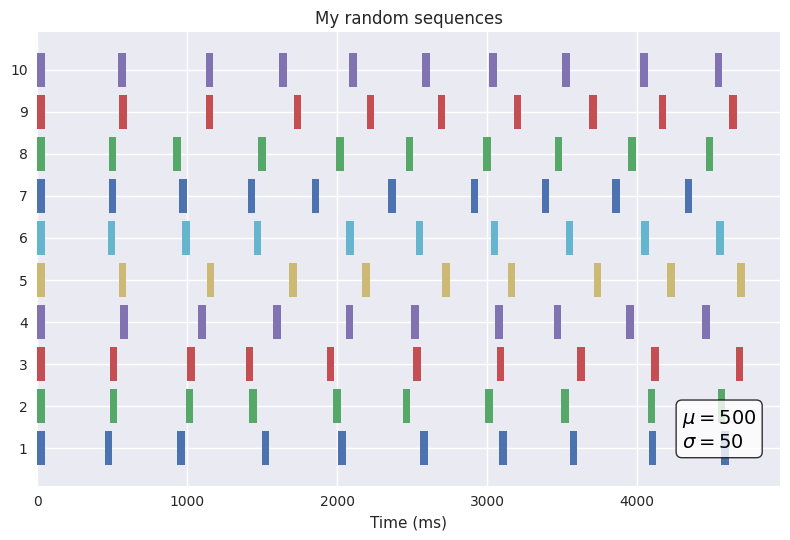

In [59]:
import matplotlib.pyplot as plt

# Generate random sequences (use a generator with a seed so you get the same results as us)
rng = np.random.default_rng(seed=123)
seqs = [Sequence.generate_random_normal(n=10, mu=500, sigma=50, rng=rng) for _ in range(10)]

# Use the Sequence.plot() method
fig, ax = plot_multiple_sequences(seqs,
                                  title='My random sequences',
                                  suppress_display=True)

# Add in some text with a box around it
box_properties = dict(boxstyle='round', facecolor='white', alpha=0.8)
ax.text(4300, 0.01, s="$\mu = 500$\n$\sigma = 50$", bbox=box_properties, fontsize=14)

# Show
plt.show();